In [12]:
import numpy as np
import pandas as pd
import sys,os
from matplotlib import pyplot as plt
%matplotlib inline
from alabtools.analysis import HssFile

In [2]:
# Read in HSS file
hss = HssFile('CTRL.hss', 'r')
# First, we need to know which beads that represent the diffrent copies belong to the same bin in genome
copy_index=hss.index.copy_index
print(copy_index)
print(len(copy_index))

{0: [0, 13640], 1: [1, 13641], 2: [2, 13642], 3: [3, 13643], 4: [4, 13644], 5: [5, 13645], 6: [6, 13646], 7: [7, 13647], 8: [8, 13648], 9: [9, 13649], 10: [10, 13650], 11: [11, 13651], 12: [12, 13652], 13: [13, 13653], 14: [14, 13654], 15: [15, 13655], 16: [16, 13656], 17: [17, 13657], 18: [18, 13658], 19: [19, 13659], 20: [20, 13660], 21: [21, 13661], 22: [22, 13662], 23: [23, 13663], 24: [24, 13664], 25: [25, 13665], 26: [26, 13666], 27: [27, 13667], 28: [28, 13668], 29: [29, 13669], 30: [30, 13670], 31: [31, 13671], 32: [32, 13672], 33: [33, 13673], 34: [34, 13674], 35: [35, 13675], 36: [36, 13676], 37: [37, 13677], 38: [38, 13678], 39: [39, 13679], 40: [40, 13680], 41: [41, 13681], 42: [42, 13682], 43: [43, 13683], 44: [44, 13684], 45: [45, 13685], 46: [46, 13686], 47: [47, 13687], 48: [48, 13688], 49: [49, 13689], 50: [50, 13690], 51: [51, 13691], 52: [52, 13692], 53: [53, 13693], 54: [54, 13694], 55: [55, 13695], 56: [56, 13696], 57: [57, 13697], 58: [58, 13698], 59: [59, 13699],

In [19]:
hss.radii

array([124.41722, 124.41722, 124.41722, ..., 124.41722, 124.41722,
       124.41722], dtype=float32)

In [3]:
# get chromosome names, start and end positions of the bins
index = hss.index
index_chroms = index.chromstr
index_starts = index.start
index_ends = index.end
crds=hss.coordinates

In [8]:
# iterate keys over copy_index, and get the coordinates of the beads that belong to the same bin, 
# then get the average radials of the beads that belong to the same bin, write chr start end and average 
# radial to a file
for bin in copy_index:
    #get chr, start, end, of the bin
    bead_0=copy_index[bin][0]
    chr=index_chroms[bead_0]
    start=index_starts[bead_0]
    end=index_ends[bead_0]
    #get the radials of the beads that belong to the same bin
    radials = hss.getBeadRadialPositions(copy_index[bin], nucleusRadius=(3050, 2350, 2350))
    #write chr start end and average radial to a file
    with open('mouse_heart_CTRL_RAD.bed', 'a') as f:
        f.write(chr+'\t'+str(start)+'\t'+str(end)+'\t'+str(np.mean(radials))+'\n')
    f.close()

In [15]:
radials = hss.getBeadRadialPositions([0, 13640], nucleusRadius=(3050, 2350, 2350))

In [16]:
radials

array([[2.78142748, 1.75981803, 1.67906651, ..., 1.48529253, 1.45665404,
        2.51426948],
       [1.85819421, 1.47072152, 1.62374357, ..., 1.38588202, 1.88244748,
        1.95745208]])

In [5]:
#compute the std of the radials of the beads that belong to the same bin
for bin in copy_index:
    #get chr, start, end, of the bin
    bead_0=copy_index[bin][0]
    chr=index_chroms[bead_0]
    start=index_starts[bead_0]
    end=index_ends[bead_0]
    #get the radials of the beads that belong to the same bin
    radials = hss.getBeadRadialPositions(copy_index[bin], nucleusRadius=(3050, 2350, 2350))
    #write chr start end and average radial to a file
    with open('mouse_heart_CTRL_RAD_std.bed', 'a') as f:
        f.write(chr+'\t'+str(start)+'\t'+str(end)+'\t'+str(np.std(radials))+'\n')
    f.close()

In [ ]:
#compute the deltaRAD
#first, we need compute the mean RAD across the genome
#read the radial_std.txt, which contains the std of radial of each bin
radial_std=pd.read_csv('mouse_heart_CTRL_RAD_std.bed', sep='\t', header=None)
#compute the mean RAD across the genome, which is the mean of the fourth column of the radial_std.txt
mean_radial_std=np.mean(radial_std[3])

#compute delta RAD of the bin
for bin in copy_index:
    #get chr, start, end, of the bin
    bead_0=copy_index[bin][0]
    chr=index_chroms[bead_0]
    start=index_starts[bead_0]
    end=index_ends[bead_0]
    #get the radials of the beads that belong to the same bin
    radials = hss.getBeadRadialPositions(copy_index[bin], nucleusRadius=(3050, 2350, 2350))
    #write chr start end and average radial to a file
    with open('mouse_heart_CTRL_deltaRAD.bed', 'a') as f:
        f.write(chr+'\t'+str(start)+'\t'+str(end)+'\t'+str(np.log2(np.std(radials)/mean_radial_std))+'\n')
    f.close()

In [10]:
data=pd.read_csv('mouse_heart_CTRL_RAD.bed',sep='\t',header=None)


In [14]:
data

,0,1,2,3
0,chr1,0,200000,1.856325
1,chr1,200000,400000,1.847178
2,chr1,400000,600000,1.837402
3,chr1,600000,800000,1.831749
4,chr1,800000,1000000,1.811649
...,...,...,...,...
13635,chr21,90800000,91000000,1.327196
13636,chr21,91000000,91200000,1.438779
13637,chr21,91200000,91400000,1.537792
13638,chr21,91400000,91600000,1.607324


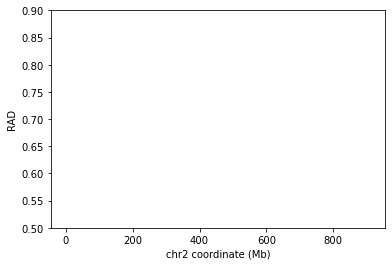

In [13]:
#plot the delta RAD for chr2
chr2=data[data[0]=='chr2']
chr2_coord=chr2[1]/200000
chr2_radial=chr2[3]
plt.plot(chr2_coord,chr2_radial)
plt.xlabel('chr2 coordinate (Mb)')
plt.ylabel('RAD')
plt.ylim(0.5,0.9)
plt.show()

In [ ]:
#generate RAD, deltaRAD for another sample
# Read in HSS file
hss = HssFile('CTRL.hss', 'r')
# First, we need to know which beads that represent the diffrent copies belong to the same bin in genome
copy_index=hss.index.copy_index
# get chromosome names, start and end positions of the bins
index = hss.index
index_chroms = index.chromstr
index_starts = index.start
index_ends = index.end
crds=hss.coordinates

# iterate keys over copy_index, and get the coordinates of the beads that belong to the same bin, 
# then get the average radials of the beads that belong to the same bin, write chr start end and average 
# radial to a file
for bin in copy_index:
    #get chr, start, end, of the bin
    bead_0=copy_index[bin][0]
    chr=index_chroms[bead_0]
    start=index_starts[bead_0]
    end=index_ends[bead_0]
    #get the radials of the beads that belong to the same bin
    radials = hss.getBeadRadialPositions(copy_index[bin], nucleusRadius=(3050, 2350, 2350))
    #write chr start end and average radial to a file
    with open('mouse_heart_CTRL_RAD.bed', 'a') as f:
        f.write(chr+'\t'+str(start)+'\t'+str(end)+'\t'+str(np.mean(radials))+'\n')
    f.close()

#compute the deltaRAD
#first, we need compute the mean RAD across the genome
#read the radial_std.txt, which contains the std of radial of each bin
radial_std=pd.read_csv('mouse_heart_CTRL_RAD_std.bed', sep='\t', header=None)
#compute the mean RAD across the genome, which is the mean of the fourth column of the radial_std.txt
mean_radial_std=np.mean(radial_std[3])

#compute delta RAD of the bin
for bin in copy_index:
    #get chr, start, end, of the bin
    bead_0=copy_index[bin][0]
    chr=index_chroms[bead_0]
    start=index_starts[bead_0]
    end=index_ends[bead_0]
    #get the radials of the beads that belong to the same bin
    radials = hss.getBeadRadialPositions(copy_index[bin], nucleusRadius=(3050, 2350, 2350))
    #write chr start end and average radial to a file
    with open('mouse_heart_CTRL_deltaRAD.bed', 'a') as f:
        f.write(chr+'\t'+str(start)+'\t'+str(end)+'\t'+str(np.log2(np.std(radials)/mean_radial_std))+'\n')
    f.close()

    